In [54]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio

In [55]:
# Load audio files
audio1, sample_rate1 = torchaudio.load('data/atc_clip.wav')
audio2, sample_rate2 = torchaudio.load('data/atc_clip2.wav')
audio3, sample_rate3 = torchaudio.load('data/atc_clip2.wav')

# Resample audio3 to 16000 Hz
sample_rate = 16000
resampler = torchaudio.transforms.Resample(sample_rate3, sample_rate)
audio3 = resampler(audio3)

# Clip audio3 from 3s to 3.35s
audio3 = audio3[:, int(3*sample_rate):int(3.35*sample_rate)]

# Repeat audio3 50 times
audio3 = audio3.repeat(1, 50)

# Clip to 10 seconds
audio3 = audio3[:, :10*sample_rate]

print(audio3)

tensor([[ 0.0136,  0.0080,  0.0077,  ...,  0.0003, -0.0194, -0.0369]])


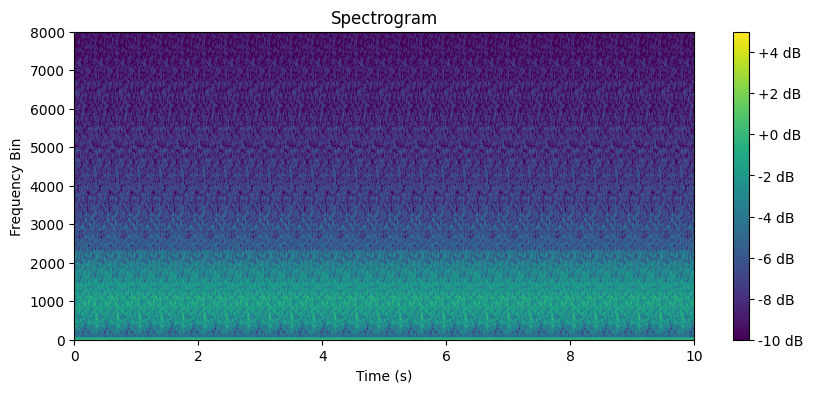

In [56]:
def create_spectrogram(waveform, sample_rate):
  # Create a spectrogram from the waveform
  spectrogram = torchaudio.transforms.Spectrogram()(waveform)

  # Convert the spectrogram to numpy array for plotting
  spectrogram_np = spectrogram.numpy()

  # Get number of frames from the spectrogram shape
  num_frames = spectrogram_np.shape[2]

  # Get the time axis values
  duration = waveform.shape[1] / sample_rate
  time_axis = np.linspace(0, duration, num_frames)

  # Plot and save the spectrogram
  plt.figure(figsize=(10, 4))
  plt.imshow(np.log(spectrogram_np[0, :, :]), aspect='auto', origin='lower',
             vmin=-10, vmax=5, extent=[time_axis.min(), time_axis.max(), 0, sample_rate/2])
  plt.title('Spectrogram')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency Bin')
  plt.colorbar(format="%+2.0f dB")

  plt.show()

# create_spectrogram(audio1, sample_rate1)
# create_spectrogram(audio2, sample_rate2)
create_spectrogram(audio3, sample_rate)

IPython.display.Audio(audio3.numpy(), rate=sample_rate)

# save audio file
torchaudio.save('real_noise.wav', audio3, sample_rate)